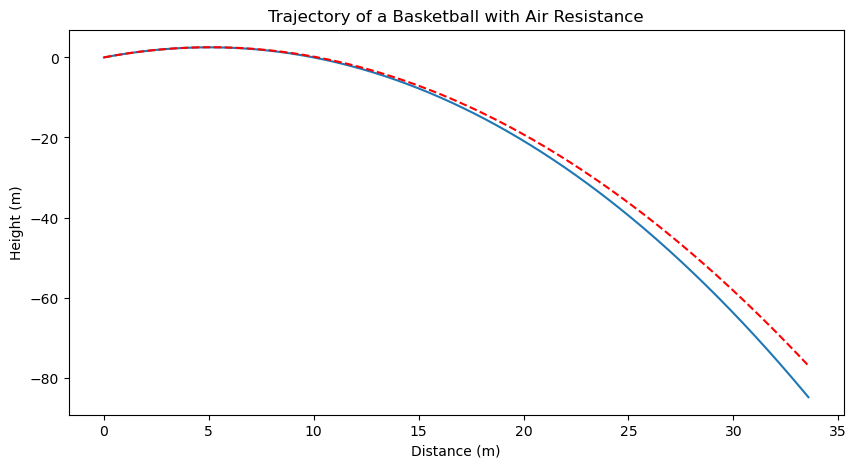

In [ ]:
# Trajectory of a basketball with air resistance

# import odeint from scipy.integrate
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # acceleration due to gravity [m/s^2]
m = 0.625  # mass of basketball [kg]
r = 0.12  # radius of basketball [m]
A = np.pi * r**2  # cross-sectional area [m^2]
rho = 1.225  # air density [kg/m^3]
Cd = 0.47  # drag coefficient for a sphere
k = 0.5 * Cd * rho * A / m  # drag constant

# Initial conditions
v0 = 10.0  # initial speed [m/s]
theta = 45.0  # launch angle [degrees]
theta_rad = np.radians(theta)
vx0 = v0 * np.cos(theta_rad)  # initial x-velocity [m/s]
vy0 = v0 * np.sin(theta_rad)  # initial y-velocity [m/s]
y0 = 0  # initial height [m]

# Time vector
t = np.linspace(0, 5, 500)  # time from 0 to 5 seconds

# Define the system of ODEs
def deriv(w, t):
    vx, vy, x, y_pos = w
    v = np.sqrt(vx**2 + vy**2)
    dvxdt = -k * v * vx
    dvydt = -g - k * v * vy
    dxdt = vx
    dydt = vy
    return [dvxdt, dvydt, dxdt, dydt]

# Initial state vector
w_init = [vx0, vy0, 0, y0]

# Integrate the ODEs
sol = odeint(deriv, w_init, t)
vx, vy, x, y_pos = sol.T

# Plot the trajectory
plt.figure(figsize=(10, 5))
plt.plot(x, y_pos)
plt.plot(x, x * np.tan(theta_rad) - (g / (2 * v0**2 * np.cos(theta_rad)**2)) * x**2, 'r--', label='No Air Resistance')
plt.title('Trajectory of a Basketball with Air Resistance')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
#plt.ylim(0, None)
#plt.grid()
plt.show()